# Problem 1: Linear Regression Case study on Gem Stones Co Ltd.
A company Gem Stones co ltd, which is a cubic zirconia manufacturer. We are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. We have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide with the best 5 attributes that are most important.



# Import libraries and load data

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.style
from numpy import nan
plt.style.use('classic')
import seaborn as sns
%matplotlib inline

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

In [9]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.2
1.1.3
0.11.1


In [10]:
df=pd.read_csv('cubic_zirconia.csv') 

In [11]:
df.head(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
5,6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
6,7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
7,8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
8,9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
9,10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


In [12]:
df.tail(20)

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
26947,26948,1.18,Premium,I,SI1,61.8,58.0,6.78,6.74,4.18,5617
26948,26949,0.35,Ideal,D,SI1,61.6,56.0,4.53,4.49,2.78,827
26949,26950,1.03,Ideal,G,VVS1,62.0,56.0,6.54,6.50,4.04,8398
26950,26951,1.34,Ideal,H,VS2,61.9,55.0,7.05,7.08,4.37,8771
26951,26952,1.14,Ideal,E,VVS2,61.6,57.0,6.68,6.73,4.13,11206
26952,26953,0.31,Premium,E,SI1,58.3,60.0,4.51,4.48,2.62,698
26953,26954,1.02,Premium,G,SI1,62.3,59.0,6.44,6.40,4.00,4718
26954,26955,0.50,Good,G,VVS2,63.8,56.0,5.06,5.03,3.22,1806
26955,26956,0.92,Good,E,SI1,63.3,57.0,6.17,6.22,3.92,3649
26956,26957,0.31,Ideal,E,VS2,62.3,57.0,4.32,4.35,2.70,680


In [13]:
# drop the Unnamed: 0 column as it is useless for the model
#df = df.drop('Unnamed: 0', axis=1)

# Q 1.1 Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

# Checking the data

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [15]:
print('The number of rows are {} and the columns are {}'.format(df.shape[0],df.shape[1]))

The number of rows are 26967 and the columns are 11


In [16]:
print('The total number of elements of the dataset are: ')
df.size

The total number of elements of the dataset are: 


296637

# Checking for Missing Values

In [17]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

There are 697 missing values.

# Checking for Duplicates

In [18]:
df.duplicated().sum()

0

There are 0 Duplicates in the dataset

# Checking Summary Statistic

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,26967.0,13484.000000,7784.846691,1.0,6742.50,13484.00,20225.50,26967.00
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


we can see that the mean and the median values are almost the same.
The table has high standard of deviation compare to others.

# Checking for Outliers

<AxesSubplot:>

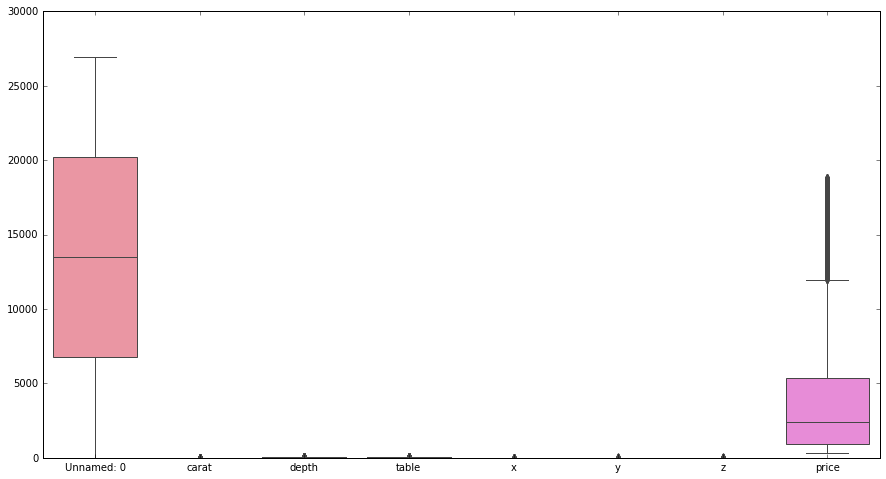

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

The variables carat, depth, table, x, y, z and price have outliers.

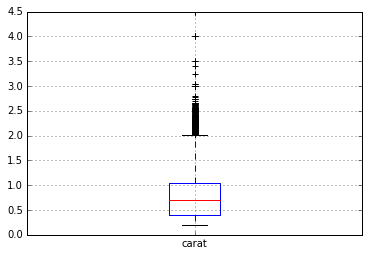

In [21]:
df.boxplot(column=['carat'])
plt.show()

We can see that carat has few outliers.

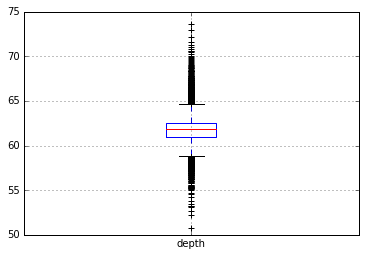

In [22]:
df.boxplot(column=['depth'])
plt.show()

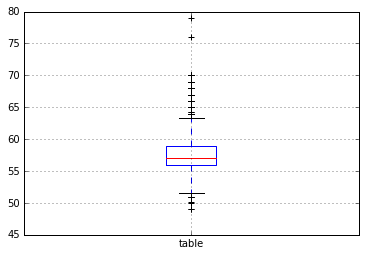

In [23]:
df.boxplot(column=['table'])
plt.show()

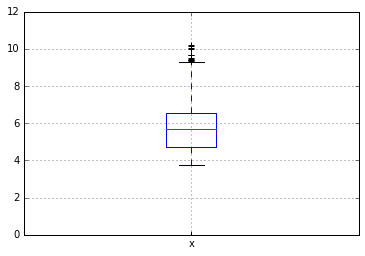

In [24]:
df.boxplot(column=['x'])
plt.show()

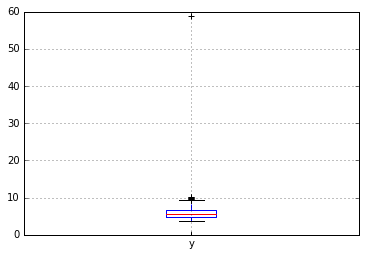

In [25]:
df.boxplot(column=['y'])
plt.show()

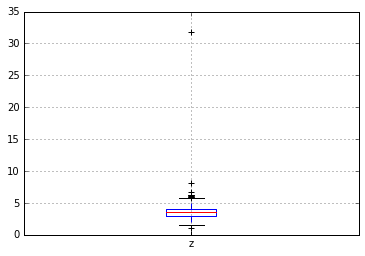

In [26]:
df.boxplot(column=['z'])
plt.show()

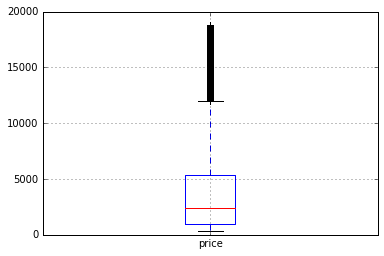

In [27]:
df.boxplot(column=['price'])
plt.show()

# Univariate Analysis

Univariate / Bivariate analysis helps us understand the distrubuton of the dataset. With the vsulaisaton we can understand the data and to solve the problem

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

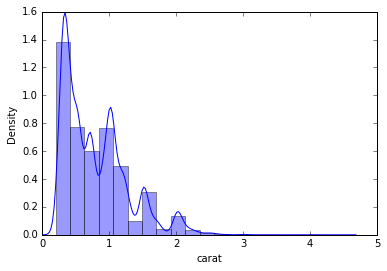

In [28]:
sns.distplot(df.carat,bins=20)  # histogram of carat

We can see that Spending is possitively skewed

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='depth', ylabel='Density'>

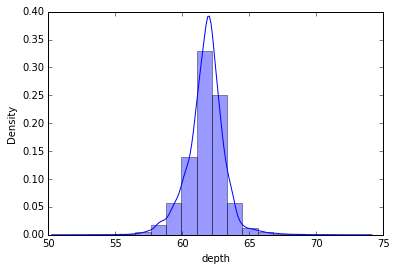

In [29]:
sns.distplot(df.depth,bins=20)  # histogram of depth

We can see that depth is nearly normally distributed. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='table', ylabel='Density'>

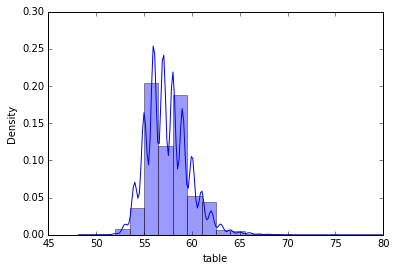

In [30]:
sns.distplot(df.table,bins=20)  # histogram of table

table is positively skewed

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='x', ylabel='Density'>

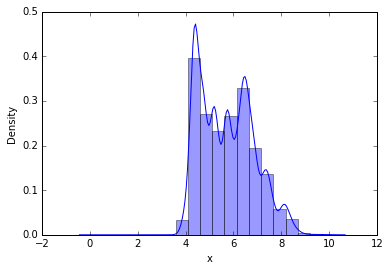

In [31]:
sns.distplot(df.x,bins=20)  # histogram of x

credit_limit is positively skewed.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y', ylabel='Density'>

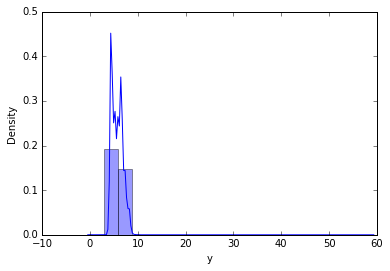

In [32]:
sns.distplot(df.y,bins=20)  # histogram of y

We can see that min_payment_amt is positively skewed.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='z', ylabel='Density'>

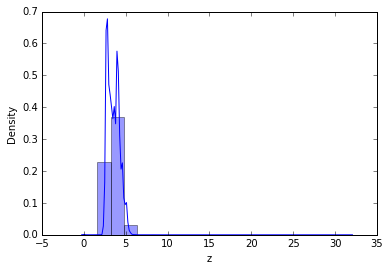

In [33]:
sns.distplot(df.z,bins=20)  # histogram of z

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

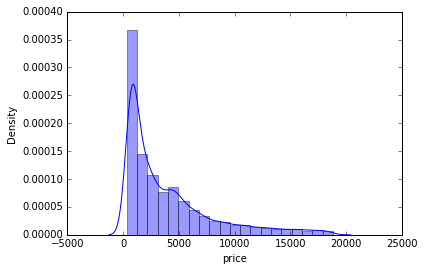

In [34]:
sns.distplot(df.price,bins=20)  # histogram of price

We can see price is positively skewed data.

In [35]:
df.skew()

Unnamed: 0    0.000000
carat         1.116481
depth        -0.028618
table         0.765758
x             0.387986
y             3.850189
z             2.568257
price         1.618550
dtype: float64

# Categorical variable analysis

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

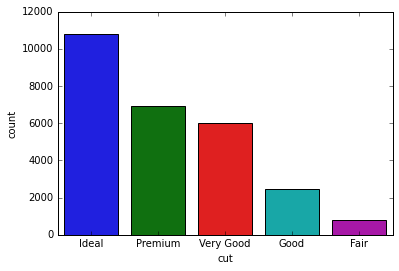

In [36]:
sns.countplot(x='cut', data=df);
df['cut'].value_counts()

We can see that the Ideal cut is more in number 10816 to be specific and Fair is less in number ie 781.

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64

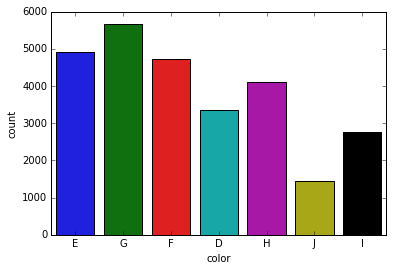

In [37]:
sns.countplot(x='color', data=df);
df['color'].value_counts()

We can see that the G colour is more in number ie 5661 and J which is the best one is less in number ie 1443.

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64

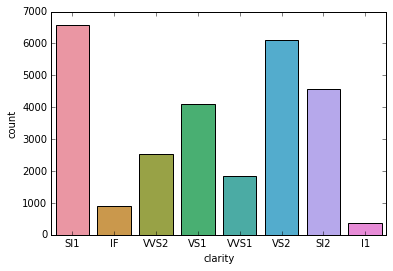

In [38]:
sns.countplot(x='clarity', data=df);
df['clarity'].value_counts()

 cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

IF is the worst which is 894 and I1 is the best which is 365. 

# Bivariate analysis Categorical variable analysis

# Cut vs Price

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

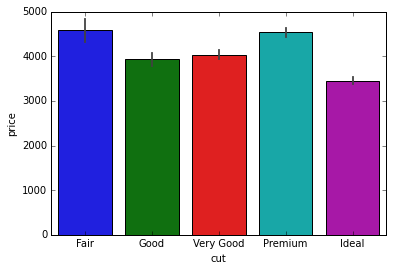

In [39]:
sns.barplot(data = df, x='cut',y='price',order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
df['cut'].value_counts()

The  reason  for  the  most  preferred  cut  ideal  is  because  those  diamonds  are  priced lower  than  other  cuts.

In [40]:
a = pd.pivot_table(df, 'price', index=['cut'])
p_cut = a.sort_values(('price'), ascending=False)
p_cut.head()

,price
cut,
Fair,4579.248399
Premium,4548.263806
Very Good,4034.462852
Good,3930.581729
Ideal,3454.119730


Price of Fair cut is more ie. 4579 and next is Premium.

# Color vs Price

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64

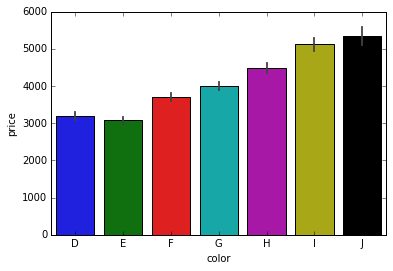

In [41]:
sns.barplot(data = df, x='color',y='price',order = ['D', 'E', 'F', 'G','H', 'I', 'J'] )
df['cut'].value_counts()

In [42]:
a = pd.pivot_table(df, 'price', index=['color'])
p_color = a.sort_values(('price'), ascending=False)
p_color.head()

,price
color,
J,5331.453915
I,5129.830386
H,4486.713554
G,4002.694400
F,3699.880313


Price of color with J is more ie 5331.45 and the count of J is 1443.

# clarity vs price

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clarity', ylabel='count'>

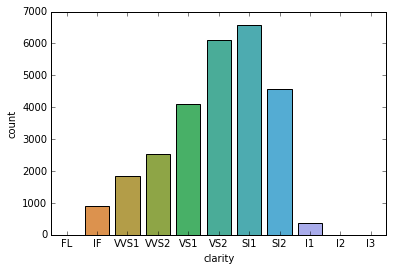

In [43]:
sns.countplot(df['clarity'], order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

In [44]:
a = pd.pivot_table(df, 'price', index=['clarity'])
p_clarity = a.sort_values(('price'), ascending=False)
p_clarity.head()

,price
clarity,
SI2,5095.000437
SI1,3998.155228
VS2,3968.759961
I1,3906.547945
VS1,3838.876130


Price of clarity with SI2 is more ie 5095 and the count of SI2 is 6571.

<AxesSubplot:xlabel='clarity', ylabel='price'>

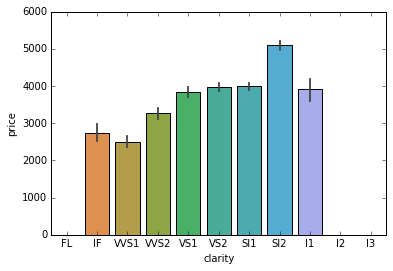

In [45]:
sns.barplot(data = df, x='clarity',y='price', order =['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

# Depth vs price

In [46]:
a = pd.pivot_table(df, 'price', index=['depth'])
p_depth = a.sort_values(('price'), ascending=False)
p_depth.head()

,price
depth,
70.6,11486.000000
67.7,10255.333333
69.1,8736.000000
69.6,7560.000000
70.5,6860.000000


WE can say that zirconia with 70.6 depth has more priced compare to others.

In [47]:
a = pd.pivot_table(df, 'price', index=['table'])
p_table = a.sort_values(('price'), ascending=False)
p_table.head()

,price
table,
50.0,13764.000
51.6,13203.000
58.6,12378.000
57.2,8319.000
58.5,7772.875


WE can say that zirconia with 50 table has more priced compare to others.

In [48]:
a = pd.pivot_table(df, 'price', index=['x'])
p_x = a.sort_values(('price'), ascending=False)
p_x.head()

,price
x,
9.66,18701.0
9.51,18559.0
10.23,18531.0
8.77,18485.0
9.36,18242.0


WE can say that zirconia with 9.66 Length has more priced compare to others.

In [49]:
a = pd.pivot_table(df, 'price', index=['y'])
p_y = a.sort_values(('price'), ascending=False)
p_y.head()

,price
y,
9.63,18701.0
9.46,18559.0
10.16,18531.0
9.01,18242.0
8.94,18136.0


WE can say that zirconia with 9.63 Width has more priced compare to others.

In [50]:
a = pd.pivot_table(df, 'price', index=['z'])
p_z = a.sort_values(('price'), ascending=False)
p_z.head()

,price
z,
6.72,18531.0
5.62,18400.5
5.90,18242.0
5.77,18242.0
5.40,17549.5


WE can say that zirconia with 6.72 Height has more priced compare to others.

In [51]:
pd.crosstab(df['cut'], df['color'])

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,74,100,148,147,150,94,68
Good,311,491,454,419,352,253,161
Ideal,1409,1966,1893,2470,1552,1073,453
Premium,808,1174,1167,1471,1161,711,407
Very Good,742,1186,1067,1154,887,640,354


<AxesSubplot:xlabel='cut'>

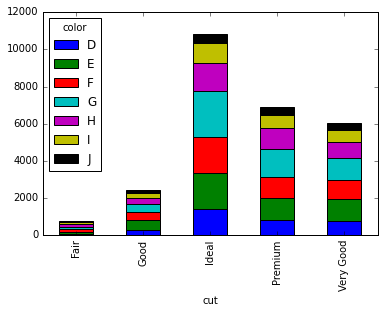

In [52]:
pd.crosstab(df['cut'], df['color']).plot(kind = 'bar', stacked = True)

In [53]:
pd.crosstab(df['cut'], df['clarity'])

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,89,4,193,225,93,129,10,38
Good,51,30,765,530,331,491,100,143
Ideal,74,613,2150,1324,1784,2528,1036,1307
Premium,108,115,1809,1449,998,1697,307,416
Very Good,43,132,1654,1047,887,1254,386,627


<AxesSubplot:xlabel='cut'>

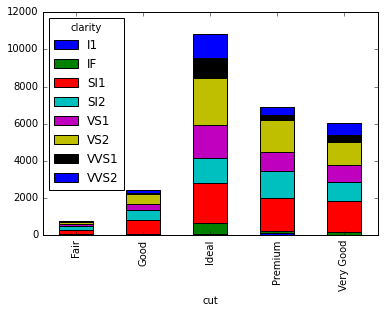

In [54]:
pd.crosstab(df['cut'], df['clarity']).plot(kind = 'bar', stacked = True)

# Multivariate Analysis

In [55]:
#df.drop([''], axis=1, inplace=True)

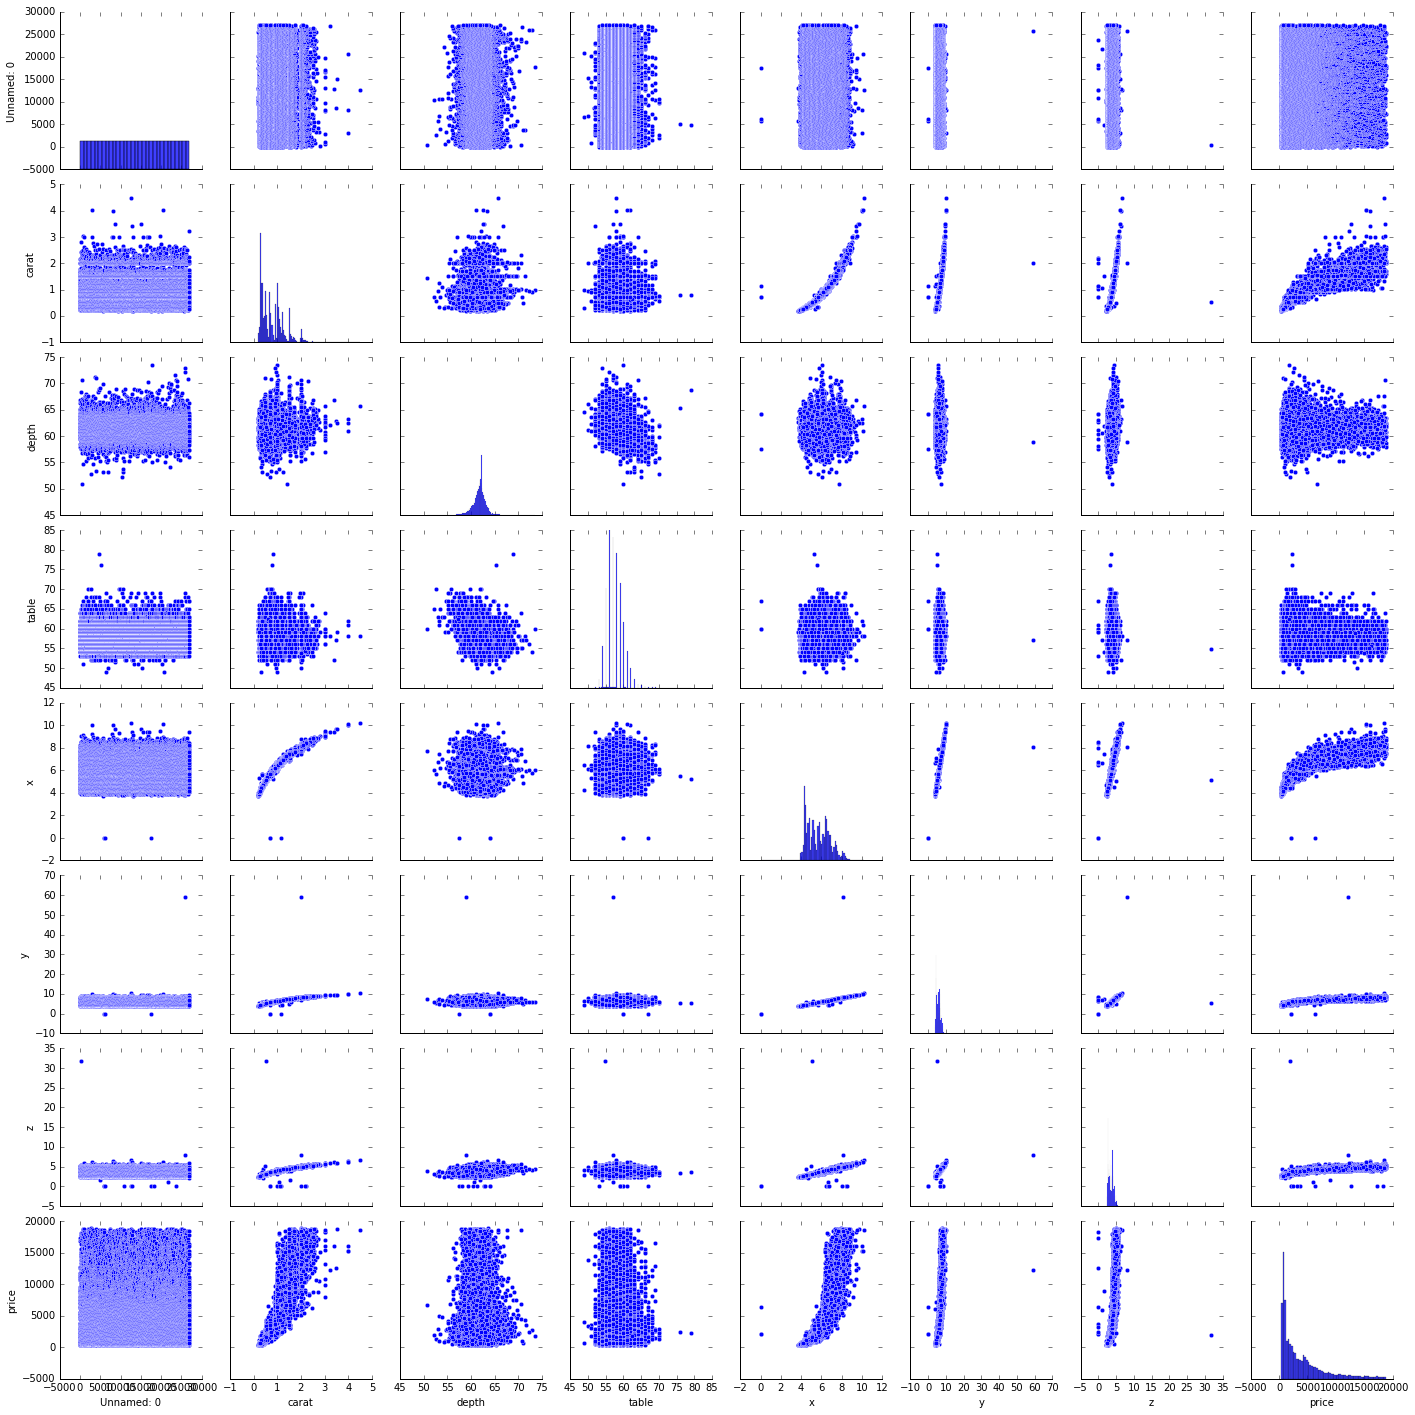

In [56]:
sns.pairplot(df)
plt.show()

In [57]:
correlation = df.corr()
correlation

,Unnamed: 0,carat,depth,table,x,y,z,price
Unnamed: 0,1.000000,0.003490,-0.001588,0.003817,0.004626,0.006844,0.001681,0.002650
carat,0.003490,1.000000,0.035364,0.181685,0.976368,0.941071,0.940640,0.922416
depth,-0.001588,0.035364,1.000000,-0.298011,-0.018715,-0.024735,0.101624,-0.002569
table,0.003817,0.181685,-0.298011,1.000000,0.196206,0.182346,0.148944,0.126942
x,0.004626,0.976368,-0.018715,0.196206,1.000000,0.962715,0.956606,0.886247
y,0.006844,0.941071,-0.024735,0.182346,0.962715,1.000000,0.928923,0.856243
z,0.001681,0.940640,0.101624,0.148944,0.956606,0.928923,1.000000,0.850536
price,0.002650,0.922416,-0.002569,0.126942,0.886247,0.856243,0.850536,1.000000


There is strong correlation between x and carat, y and carat, z and carat, z and depth

<AxesSubplot:>

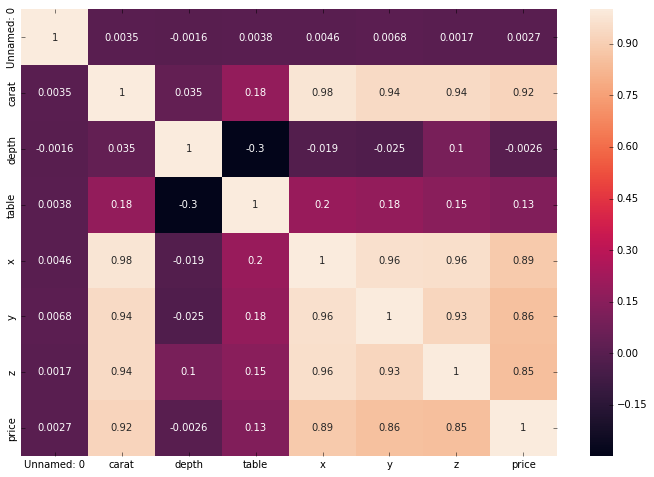

In [58]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot = True)

From the above figure we can observe that
There is a strong correlation between 
1) x and carat.

2) y and carat.

3) z and carat.

4) price and carat.

5) y and x

6) z and x.
This says as x,y,z increases carat also increases and as the carat increases price also increases 

This shows that there is multicollinearity in the database.

# Q 1.2   Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [59]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

There are 697 missing values in depth variable.

# Imputing missing values

In [60]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [61]:
(df == 0).all()

Unnamed: 0    False
carat         False
cut           False
color         False
clarity       False
depth         False
table         False
x             False
y             False
z             False
price         False
dtype: bool

# The values which are equal to zero are 

In [62]:
num_missing = (df == 0).sum()
# report the results
print(num_missing)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             3
y             3
z             9
price         0
dtype: int64


X Length of the cubic zirconia in mm.
Y Width of the cubic zirconia in mm.
Z Height of the cubic zirconia in mm.
If the length, width and height of the cubic zirconia are all 0 then carat should also be zero.
So it is better if we change it to the mean or median.

# Imputing the zero values

In [63]:
# replace '0' values with 'nan'
df = df.replace(0, nan)

In [64]:
num_missing = (df == 0).sum()
# report the results
print(num_missing)

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64


In [65]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)    
        
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
x             0
y             0
z             0
price         0
dtype: int64

In [66]:
#df[df['price'] == 6381]
df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


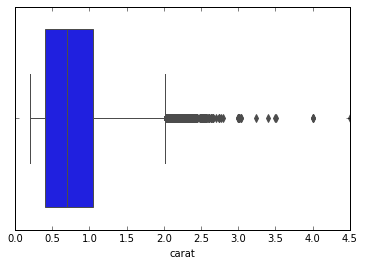

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


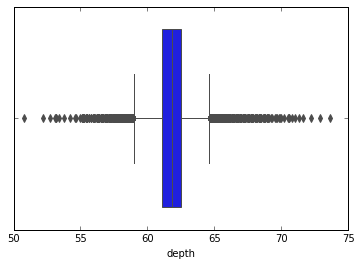

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


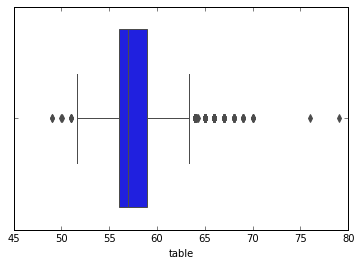

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


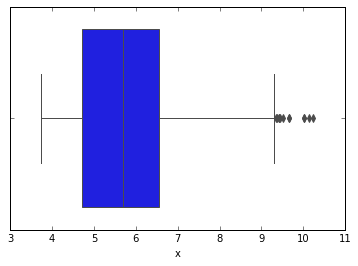

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


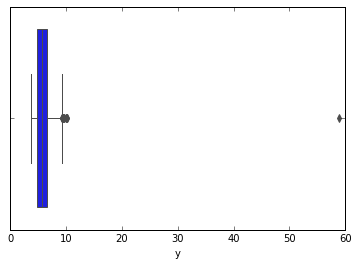

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


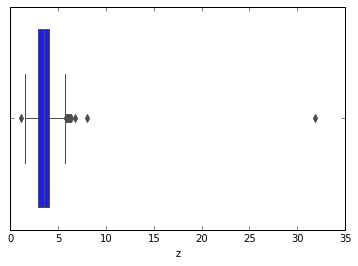

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


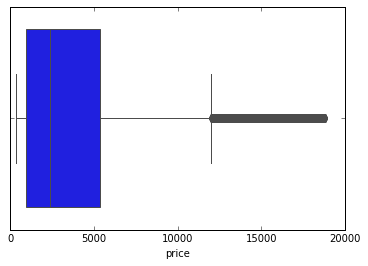

In [113]:
#Outliers 

cols = ['carat' ,'depth', 'table', 'x', 'y', 'z',
       'price']

for i in cols:
    sns.boxplot(df[i])
    plt.show()

WE are treating outliers

In [6]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='object')].index

In [67]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [68]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

<AxesSubplot:>

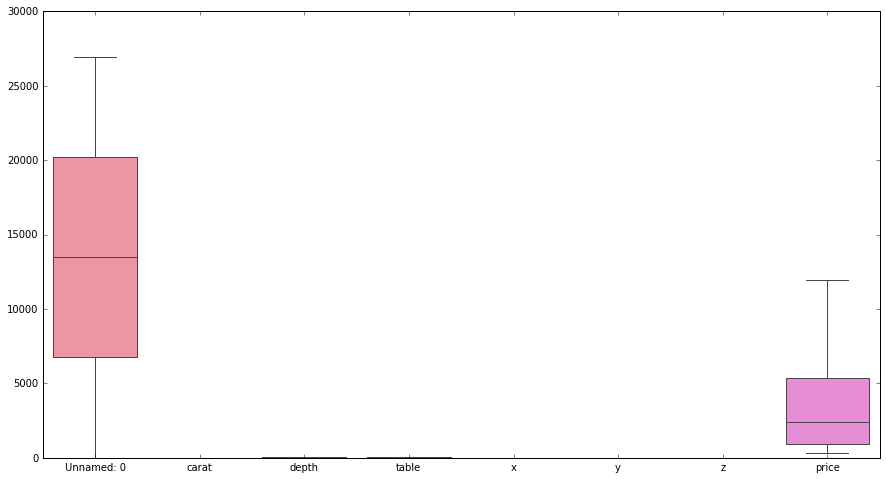

In [69]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df)

# Combining the sub levels of a ordinal variables 

In [124]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CUT :  5
Fair           781
Good          2441
Very Good     6030
Premium       6899
Ideal        10816
Name: cut, dtype: int64


COLOR :  7
J    1443
I    2771
D    3344
H    4102
F    4729
E    4917
G    5661
Name: color, dtype: int64


CLARITY :  8
I1       365
IF       894
VVS1    1839
VVS2    2531
VS1     4093
SI2     4575
VS2     6099
SI1     6571
Name: clarity, dtype: int64




In [125]:
df[['carat' ,'depth', 'table', 'x', 'y', 'z','price']].nunique()

carat     183
depth      58
table      99
x         521
y         517
z         345
price    7282
dtype: int64

# Q 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

# Converting categorical to dummy variables
Encoding the data (having string values) for Modelling

In [126]:
df = pd.get_dummies(df, columns=['cut','color','clarity'],drop_first=True)

In [128]:
df.head()

,Unnamed: 0,carat,depth,table,x,y,z,price,cut_Good,cut_Ideal,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.0,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,2.0,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,3.0,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,5.0,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,1,...,0,0,0,0,0,0,0,0,1,0


We do Ordinal encoding to ensure the encoding of variables retains the ordinal nature of the variable. This is reasonable only for ordinal variables. This encoding looks almost similar to Label Encoding but slightly different as Label coding would not consider whether the variable is ordinal or not, and it will assign a sequence of integers

In [129]:
df.columns

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z', 'price',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_IF',
       'clarity_SI1', 'clarity_SI2', 'clarity_VS1', 'clarity_VS2',
       'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     26967 non-null  float64
 1   carat          26967 non-null  float64
 2   depth          26967 non-null  float64
 3   table          26967 non-null  float64
 4   x              26967 non-null  float64
 5   y              26967 non-null  float64
 6   z              26967 non-null  float64
 7   price          26967 non-null  float64
 8   cut_Good       26967 non-null  uint8  
 9   cut_Ideal      26967 non-null  uint8  
 10  cut_Premium    26967 non-null  uint8  
 11  cut_Very Good  26967 non-null  uint8  
 12  color_E        26967 non-null  uint8  
 13  color_F        26967 non-null  uint8  
 14  color_G        26967 non-null  uint8  
 15  color_H        26967 non-null  uint8  
 16  color_I        26967 non-null  uint8  
 17  color_J        26967 non-null  uint8  
 18  clarit

# Train-Test Split

In [131]:
# drop the id column as it is useless for the model
df = df.drop(columns=['Unnamed: 0'], axis=1)

In [132]:
# Copy all the predictor variables into X dataframe
X = df.drop('price', axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [133]:
X.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.30,62.1,58.0,4.27,4.29,2.66,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0.33,60.8,58.0,4.42,4.46,2.70,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,0.90,62.2,60.0,6.04,6.12,3.78,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0.42,61.6,56.0,4.82,4.80,2.96,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.31,60.4,59.0,4.35,4.43,2.65,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [134]:
# Split X and y into training and test set in 70:30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

# Linear Regression Model

In [135]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [136]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9218.950642771502
The coefficient for depth is -0.4042282058823048
The coefficient for table is -22.772438642718214
The coefficient for x is -1263.3775098104065
The coefficient for y is 1000.954703063349
The coefficient for z is -382.11834284322714
The coefficient for cut_Good is 363.53671738392933
The coefficient for cut_Ideal is 615.7097791697761
The coefficient for cut_Premium is 594.1126202366884
The coefficient for cut_Very Good is 491.1386827231898
The coefficient for color_E is -194.40003176371377
The coefficient for color_F is -269.6801171776984
The coefficient for color_G is -420.82026154507395
The coefficient for color_H is -844.187382596224
The coefficient for color_I is -1326.0306184492079
The coefficient for color_J is -1916.270585925992
The coefficient for clarity_IF is 4048.3025188780775
The coefficient for clarity_SI1 is 2604.879495464047
The coefficient for clarity_SI2 is 1791.3482767051855
The coefficient for clarity_VS1 is 3416.9830158510

In [137]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -2313.055126280611


# Predictions on Train and Test sets using Rsquare

In [138]:
# R square on training data
regression_model.score(X_train, y_train)

0.9409105199953248

94% of the variation in the price is explained by the predictors in the model for train set

In [139]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9404531183128249

# Predictions on Train and Test sets using RMSE

In [142]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

845.5301039142506

In [143]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

842.6504228880358

# Predictions on Train and Test sets using  Adj Rsquare

# Linear Regression using statsmodels

In [144]:
vif = [variance_inflation_factor(X.values, ix) for ix in range(X.shape[1])]

In [145]:
i=0
for column in X.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.78406179880461
depth ---> 1348.4342853937171
table ---> 978.9963533401854
x ---> 11968.853608180094
y ---> 11499.091021050064
z ---> 3177.9722370725503
cut_Good ---> 4.495398493285433
cut_Ideal ---> 18.01592551826808
cut_Premium ---> 10.83893161672222
cut_Very Good ---> 10.010327160868213
color_E ---> 2.479864772837505


In [146]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,...,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
11687,0.41,62.3,56.0,4.77,4.73,2.96,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1061.0
9728,1.71,62.8,57.0,7.58,7.55,4.75,0,1,0,0,...,0,1,0,1,0,0,0,0,0,6320.0
1936,0.33,61.8,62.0,4.40,4.45,2.74,1,0,0,0,...,0,0,0,1,0,0,0,0,0,536.0
26220,0.70,62.8,57.0,5.61,5.66,3.54,0,0,0,1,...,0,0,0,1,0,0,0,0,0,2214.0
18445,0.70,62.1,56.0,5.67,5.71,3.53,0,1,0,0,...,0,0,0,0,1,0,0,0,0,2575.0


In [147]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [148]:
data_train.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)
data_test.rename(columns = {'cut_Very Good' : 'cut_Very_Good'}, inplace = True)

In [149]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [150]:
data_test.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very_Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [151]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z+cut_Good+cut_Ideal+cut_Premium+ cut_Very_Good +color_I+color_J+clarity_IF+clarity_SI1+clarity_SI2+clarity_VS1+clarity_VS2+clarity_VVS1+clarity_VVS2', data = data_train).fit()
lm1.params

Intercept       -2272.126462
carat            9062.142549
depth              -9.451063
table             -19.948952
x               -1313.081244
y                1053.187938
z                -354.770141
cut_Good          375.772254
cut_Ideal         625.205756
cut_Premium       583.884515
cut_Very_Good     498.804859
color_I          -938.738306
color_J         -1519.511395
clarity_IF       3965.422891
clarity_SI1      2625.995175
clarity_SI2      1827.853792
clarity_VS1      3389.930224
clarity_VS2      3161.648825
clarity_VVS1     3795.229529
clarity_VVS2     3811.418469
dtype: float64

In [152]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.458e+04
Date:                Wed, 22 Sep 2021   Prob (F-statistic):               0.00
Time:                        15:37:47   Log-Likelihood:            -1.5472e+05
No. Observations:               18876   AIC:                         3.095e+05
Df Residuals:                   18856   BIC:                         3.096e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2272.1265    744.994     -3.050

The overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not 0. Here all regression co-efficients are not 0

In [153]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)

In [154]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

878.2010240167247

In [155]:
np.sqrt(lm1.mse_resid) #another way

878.6666414737622

In [156]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

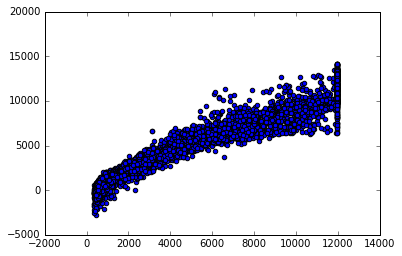

In [157]:
plt.scatter(y_test['price'], y_pred)
plt.show()

In [158]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-2272.13) * Intercept + (9062.14) * carat + (-9.45) * depth + (-19.95) * table + (-1313.08) * x + (1053.19) * y + (-354.77) * z + (375.77) * cut_Good + (625.21) * cut_Ideal + (583.88) * cut_Premium + (498.8) * cut_Very_Good + (-938.74) * color_I + (-1519.51) * color_J + (3965.42) * clarity_IF + (2626.0) * clarity_SI1 + (1827.85) * clarity_SI2 + (3389.93) * clarity_VS1 + (3161.65) * clarity_VS2 + (3795.23) * clarity_VVS1 + (3811.42) * clarity_VVS2 + 

# Q1.4 Inference: Basis on these predictions, what are the business insights and recommendations.

## Conclusion
The final Linear Regression equation is

price = (-2272.13) * Intercept + (9062.14) * carat + (-9.45) * depth + (-19.95) * table + (-1313.08) * x + (1053.19) * y + (-354.77) * z + (375.77) * cut_Good + (625.21) * cut_Ideal + (583.88) * cut_Premium + (498.8) * cut_Very_Good + (-938.74) * color_I + (-1519.51) * color_J + (3965.42) * clarity_IF + (2626.0) * clarity_SI1 + (1827.85) * clarity_SI2 + (3389.93) * clarity_VS1 + (3161.65) * clarity_VS2 + (3795.23) * clarity_VVS1 + (3811.42) * clarity_VVS2 


We can say that Ideal, Premium and VeryGood cut types are giving more profits.
Also clarity plays an important role in profting. 

The Five best attributes are :-
1) Y (Width of the cubic zirconia in mm.) of the zirconia.


2) Clarity_IF 


3) clarity_VVS2


4) clarity_VVS1


5) clarity_VS1


# THE END________________________________________________________

# Problem 2: Logistic Regression and LDA Case study on Holiday Package for a company in predicting whether an employee will buy holiday package or not

A tour and travel agency deals in selling holiday packages. We are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. We have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, we need to find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

# Import libraries and load data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import matplotlib.style
from numpy import nan
plt.style.use('classic')
import seaborn as sns
%matplotlib inline

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.metrics import r2_score

In [2]:
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.19.2
1.1.3
0.11.1


In [3]:
dff=pd.read_csv('Holiday_Package.csv') 

In [4]:
dff.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no


# Q2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

# Checking the data

In [5]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [6]:
print('The number of rows are {} and the columns are {}'.format(dff.shape[0],dff.shape[1]))

The number of rows are 872 and the columns are 8


In [7]:
print('The total number of elements of the dataset are: ')
dff.size

The total number of elements of the dataset are: 


6976

# Checking for Missing Values

In [8]:
dff.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

There are 0 missing values.

# Checking for Duplicates

In [9]:
dff.duplicated().sum()

0

There are 0 Duplicates in the dataset

In [10]:
dups = dff.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
dff[dups]

Number of duplicate rows = 0


,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign


# Checking Summary Statistic

In [11]:
dff.describe()

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
count,872.000000,872.000000,872.000000,872.000000,872.000000,872.000000
mean,436.500000,47729.172018,39.955275,9.307339,0.311927,0.982798
std,251.869014,23418.668531,10.551675,3.036259,0.612870,1.086786
min,1.000000,1322.000000,20.000000,1.000000,0.000000,0.000000
25%,218.750000,35324.000000,32.000000,8.000000,0.000000,0.000000
50%,436.500000,41903.500000,39.000000,9.000000,0.000000,1.000000
75%,654.250000,53469.500000,48.000000,12.000000,0.000000,2.000000
max,872.000000,236961.000000,62.000000,21.000000,3.000000,6.000000


In [12]:
dff.describe(include='all')

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872.000000,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,NaN,no,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,471,NaN,NaN,NaN,NaN,NaN,656
mean,436.500000,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,251.869014,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,1.000000,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,218.750000,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,436.500000,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,654.250000,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


# Checking for Outliers

<AxesSubplot:>

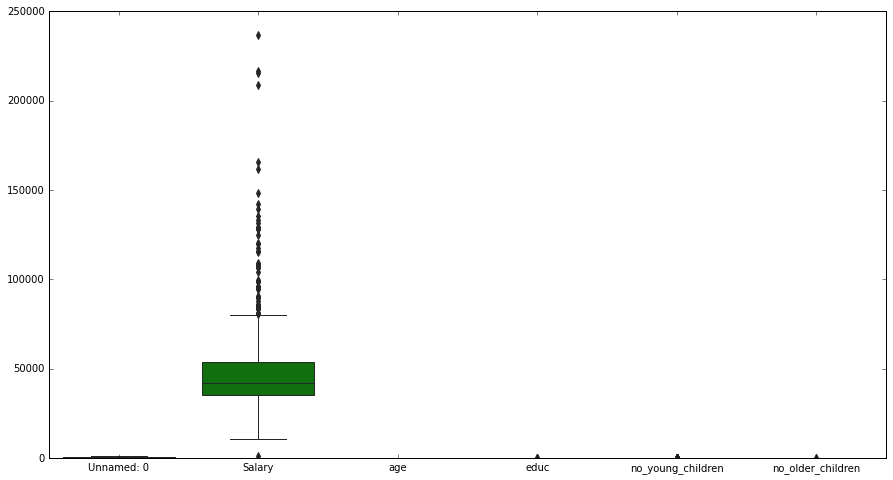

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(data=dff)

All the varaibles has outliers. We are not treating the outliers as it may not affect the output to more extent.

In [14]:

dff.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

This  split  indicates  that  45%  of  employees  are  interested  in  the  holiday  package. 

<AxesSubplot:title={'center':'Salary'}, xlabel='Salary'>

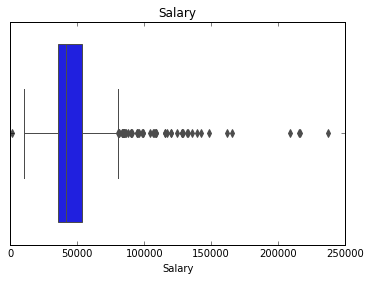

In [15]:
plt.title('Salary')
sns.boxplot(dff['Salary'])

<AxesSubplot:title={'center':'age'}, xlabel='age'>

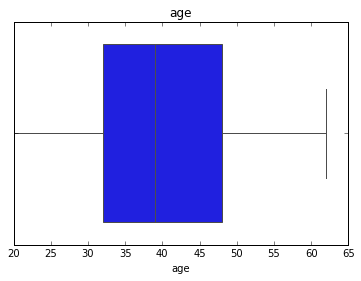

In [16]:
plt.title('age')
sns.boxplot(dff['age'])

<AxesSubplot:title={'center':'educ'}, xlabel='educ'>

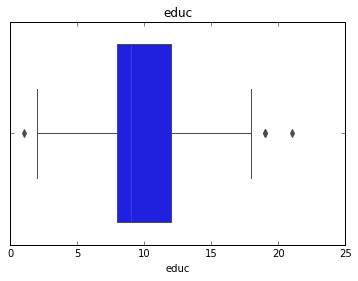

In [17]:
plt.title('educ')
sns.boxplot(dff['educ'])

<AxesSubplot:title={'center':'no_young_children'}, xlabel='no_young_children'>

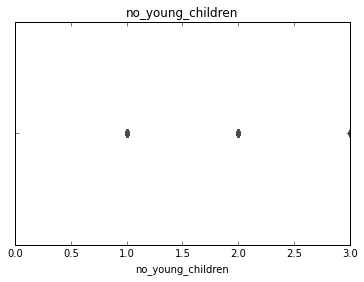

In [18]:
plt.title('no_young_children')
sns.boxplot(dff['no_young_children'])

<AxesSubplot:title={'center':'no_older_children'}, xlabel='no_older_children'>

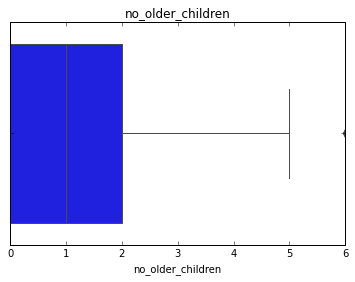

In [19]:
plt.title('no_older_children')
sns.boxplot(dff['no_older_children'])

Except for age we have outliers for all the variables.

In [22]:
dff.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

# Univariate Analysis

Univariate / Bivariate analysis helps us understand the distrubuton of the dataset. With the vsulaisaton we can understand the data and to solve the problem

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

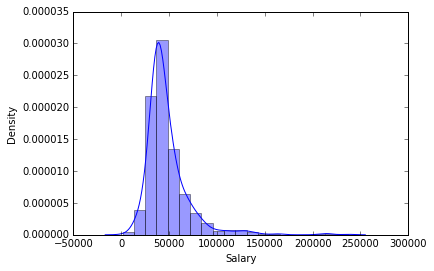

In [78]:
sns.distplot(dff.Salary,bins=20)  # histogram of Salary

We can see that Salary is possitively skewed

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

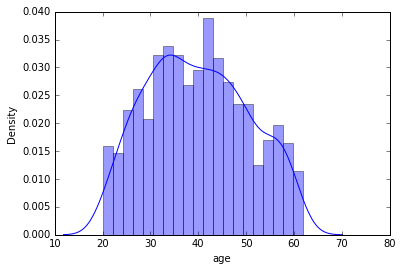

In [27]:
sns.distplot(dff.age,bins=20)  # histogram of age

We can see that probability of age is positively skewed

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='educ', ylabel='Density'>

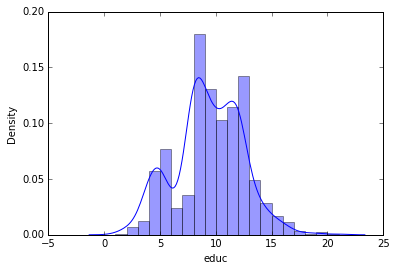

In [28]:
sns.distplot(dff.educ,bins=20)  # histogram of educ

educ is positively skewed

In [23]:
dff.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

# Categorical variables

no     471
yes    401
Name: Holliday_Package, dtype: int64

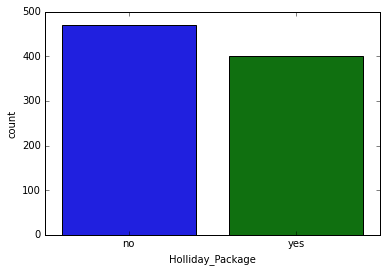

In [20]:
sns.countplot(x='Holliday_Package', data=dff);
dff['Holliday_Package'].value_counts()

We can say that maximum employees didn't choose the holiday package.

no     656
yes    216
Name: foreign, dtype: int64

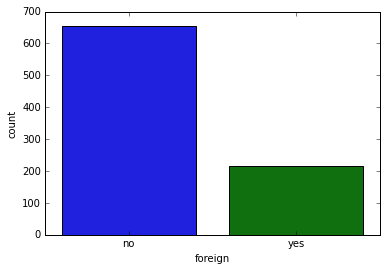

In [23]:
sns.countplot(x='foreign', data=dff);
dff['foreign'].value_counts()

We can say that maximum foreign employees didn't choose the package.

# Bivariate analysis Categorical variable analysis

# no_young_children vs Holliday_Package

0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64

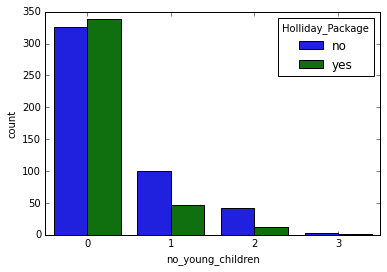

In [21]:
sns.countplot(x='no_young_children', hue='Holliday_Package' , data=dff);
dff['no_young_children'].value_counts()

We can say that maximum employees with 0 kids choose the holiday package.

# no_older_children vs Holliday_Package

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

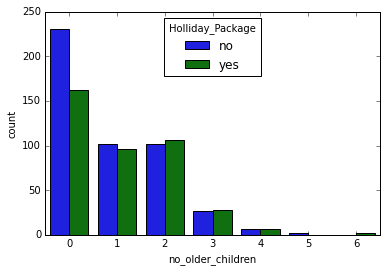

In [22]:
sns.countplot(x='no_older_children', hue='Holliday_Package' , data=dff);
dff['no_older_children'].value_counts()

We can say that maximum employees with 2,3 and 4 older_children choose the holiday package. And employees with 0 older_children didn't choose the package.

0    393
2    208
1    198
3     55
4     14
6      2
5      2
Name: no_older_children, dtype: int64

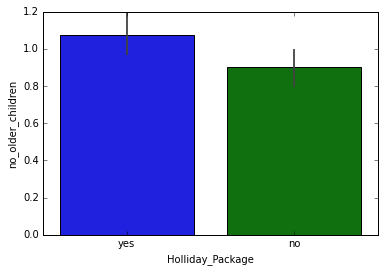

In [28]:
sns.barplot(data = dff, x='Holliday_Package',y='no_older_children',order = ['yes', 'no'] )
dff['no_older_children'].value_counts()

# foreign vs Holliday_Package

no     656
yes    216
Name: foreign, dtype: int64

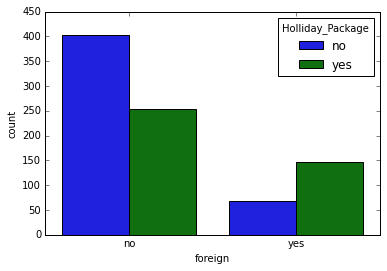

In [24]:
sns.countplot(x='foreign', hue='Holliday_Package' , data=dff);
dff['foreign'].value_counts()

The maximum foreigneer employee didn't opted for Holiday package.

Holliday_Package  no_older_children
no                0                    231
                  1                    102
                  2                    102
                  3                     27
                  4                      7
                  5                      2
yes               0                    162
                  1                     96
                  2                    106
                  3                     28
                  4                      7
                  6                      2
Name: Holliday_Package, dtype: int64

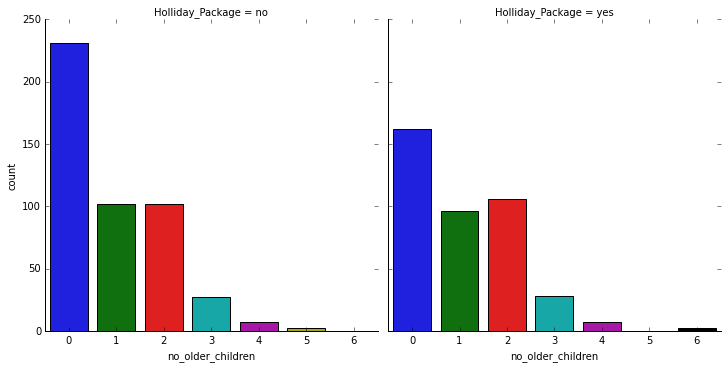

In [24]:
sns.catplot(x='no_older_children', col='Holliday_Package', kind='count', data=dff);
dff.groupby(['Holliday_Package','no_older_children'])['Holliday_Package'].count()

We can say maximum employee didn't choose the package and in that maximum employee with 0 older children choose the package then employee with 2 older kids choose the package.

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


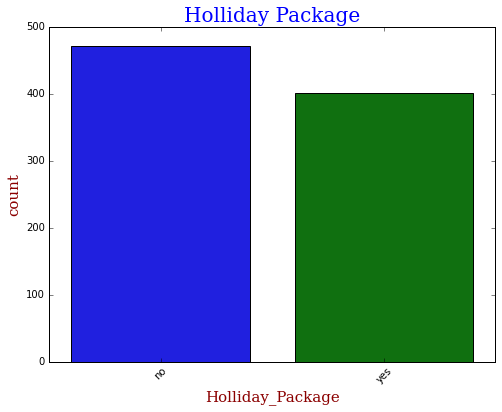

44    35
31    32
34    32
35    31
33    30
28    29
40    29
36    28
38    28
32    27
41    26
47    26
39    25
26    24
46    24
42    24
49    23
45    23
51    22
43    21
50    21
37    21
48    20
27    19
29    19
30    19
56    18
57    18
25    17
55    17
58    16
24    16
54    14
59    14
52    13
21    12
23    11
53    10
60    10
22     9
20     8
61     8
62     3
Name: age, dtype: int64

In [38]:

plt.figure(figsize = (8,6))
sns.countplot(dff['Holliday_Package'])
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("Holliday Package",fontdict = font1)
plt.xlabel("Holliday_Package",fontdict = font2)
plt.ylabel("count",fontdict = font2)
plt.xticks(rotation=45)
plt.show()
dff['age'].value_counts()


35 employees with age of 44 have purchased holiday package and only 3 employees with age of 62 have purchased holiday package.

In [54]:
age_count = pd.pivot_table(dff,'age', index=['Holliday_Package'])
values=age_count.sort_values(('age'), ascending=False)
values

,age
Holliday_Package,
no,40.853503
yes,38.900249


Text(0.5, 1.0, 'Package')

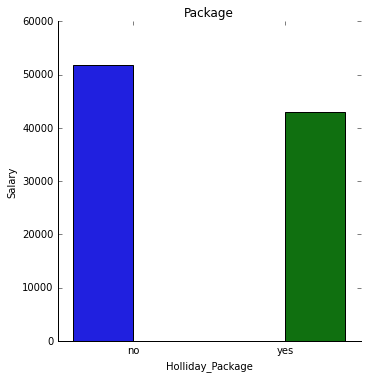

In [70]:
sns.catplot(x="Holliday_Package",y="Salary",hue ="Holliday_Package",kind="bar",ci=None, data=dff)
plt.title('Package')

Salary  less  than  50000  people  have  opted  more for  holiday  package. 

<AxesSubplot:xlabel='age', ylabel='Salary'>

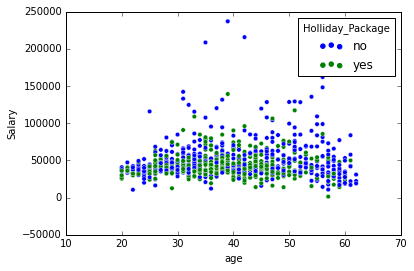

In [81]:
sns.scatterplot(data = dff, x='age',y='Salary', hue = 'Holliday_Package')

<AxesSubplot:xlabel='educ', ylabel='Salary'>

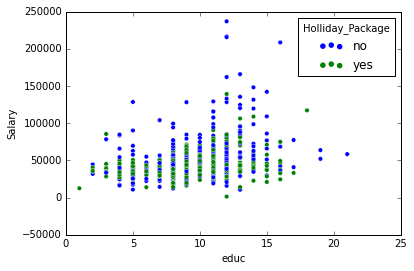

In [82]:
sns.scatterplot(data = dff, x='educ',y='Salary', hue = 'Holliday_Package')

Employee  age  over  50  to  60  have  seems  to  be  not  taking  the  holiday  package, whereas  in  the  age  30  to  50  and  salary  less  than  50000  people  have  opted  more for  holiday  package. 

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 49.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


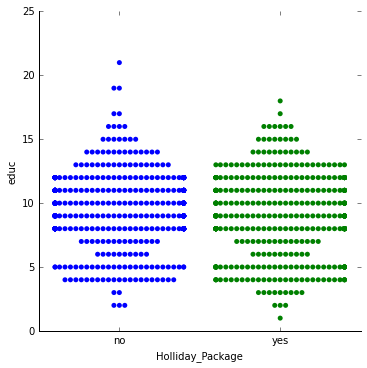

In [83]:
sns.catplot(x="Holliday_Package", y="educ",kind="swarm",data=dff)

# Multivariate Analysis

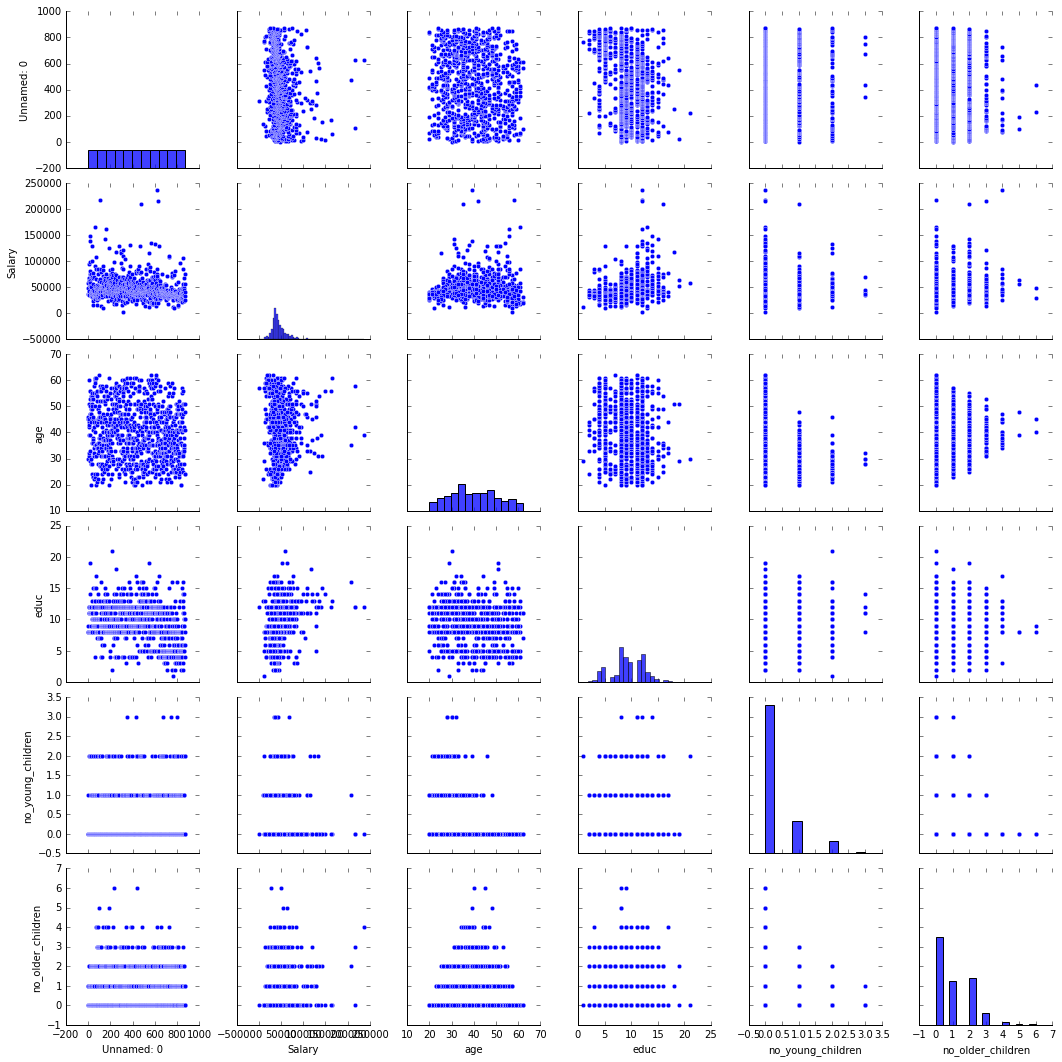

In [29]:
sns.pairplot(dff)
plt.show()

In [74]:
correlation = dff.corr()
correlation

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,1.000000,-0.193249,-0.103782,-0.296015,0.052146,-0.025852
Salary,-0.193249,1.000000,0.071709,0.326540,-0.029664,0.113772
age,-0.103782,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,-0.296015,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,0.052146,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,-0.025852,0.113772,-0.116205,-0.036321,-0.238428,1.000000


We can say that there is no relation in the dataset.

<AxesSubplot:>

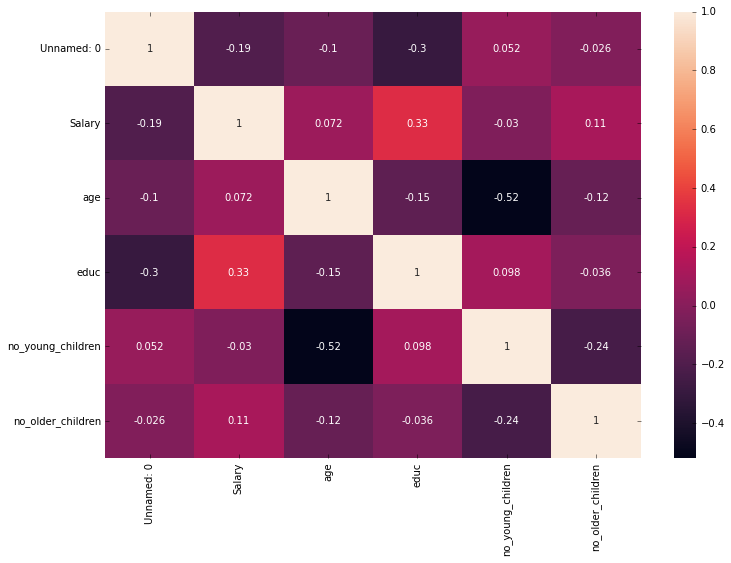

In [75]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot = True)

From the above figure we can observe that
There is a little correlation between educ and Salary

# Q2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [84]:
# drop the id column as it is useless for the model
df1 = dff.drop(columns=['Unnamed: 0'], axis=1)

In [85]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [86]:
# Converting categorical to dummy variables in data
data = pd.get_dummies(df1, columns=['Holliday_Package','foreign'], drop_first = True)

In [87]:
data.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412,30,8,1,1,0,0
1,37207,45,8,0,1,1,0
2,58022,46,9,0,0,0,0
3,66503,31,11,2,0,0,0
4,66734,44,12,0,2,0,0


In [91]:
data.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

# Train/ Test split

In [92]:

# Copy all the predictor variables into X dataframe
X = data.drop('Holliday_Package_yes', axis=1)

# Copy target into the y dataframe. 
y = data['Holliday_Package_yes']

In [95]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [96]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

In [98]:
# Applying GridSearchCV for Logistic Regression
grid={'penalty':['l1','l2','none'],'solver':['lbfgs', 'liblinear'],'tol':[0.0001,0.000001]}

In [99]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [100]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [101]:
grid_search.fit(X_train, y_train)

C:\Users\LENOVO\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1353: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [102]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, n_jobs=2, penalty='l1', solver='liblinear')


In [103]:
best_model = grid_search.best_estimator_

In [104]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [105]:
ytrain_predict

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [106]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.675066,0.324934
1,0.574273,0.425727
2,0.686681,0.313319
3,0.525134,0.474866
4,0.544101,0.455899


              precision    recall  f1-score   support

           0       0.67      0.75      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.67       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.67      0.66       610
 



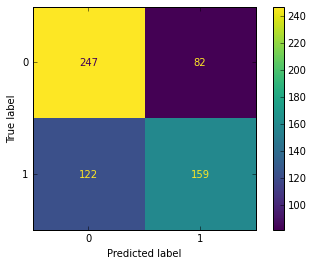

In [109]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       142
           1       0.67      0.53      0.59       120

    accuracy                           0.66       262
   macro avg       0.67      0.65      0.65       262
weighted avg       0.67      0.66      0.66       262
 



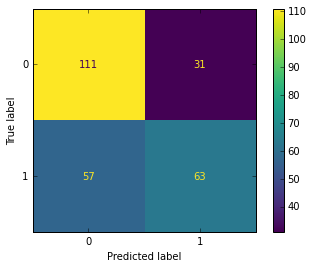

In [110]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [111]:
# Accuracy - Training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6655737704918033

# AUC and ROC for the training data


AUC: 0.734


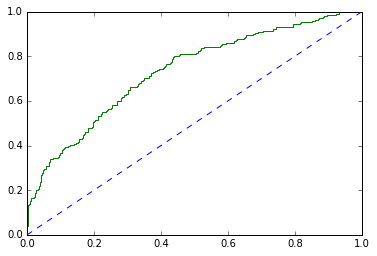

In [112]:
# predict probabilities
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [113]:
# Accuracy - Test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6641221374045801

AUC: 0.718


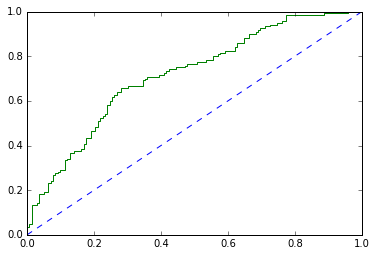

In [114]:
# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [115]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.66
lr_train_recall  0.57
lr_train_f1  0.61


In [116]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.67
lr_test_recall  0.52
lr_test_f1  0.59


# LDA MODEL

In [117]:
df1.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


In [118]:
df1.shape

(872, 7)

In [119]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 47.8+ KB


In [120]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [121]:
X = df1.drop('Holliday_Package',axis=1)
Y = df1.pop('Holliday_Package')

In [122]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [123]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [124]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [125]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int8)

In [126]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

In [127]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6639344262295082

In [128]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.58      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610



In [129]:
confusion_matrix(Y_train, pred_class_train)

array([[243,  86],
       [119, 162]], dtype=int64)

In [130]:

lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6412213740458015

In [131]:
print(classification_report(Y_test, pred_class_test))

              precision    recall  f1-score   support

           0       0.64      0.77      0.70       142
           1       0.64      0.49      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



In [132]:
confusion_matrix(Y_test, pred_class_test)

array([[109,  33],
       [ 61,  59]], dtype=int64)

### Q 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

0.1 

Accuracy Score 0.482
F1 Score 0.6393 

Confusion Matrix


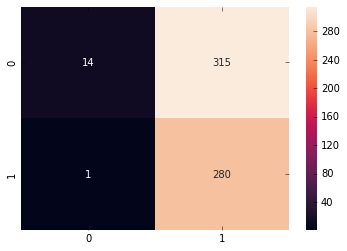

0.2 

Accuracy Score 0.5213
F1 Score 0.6499 

Confusion Matrix


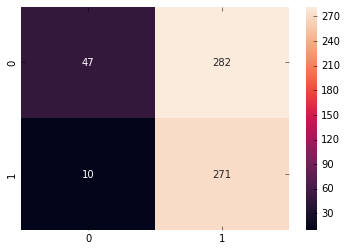

0.3 

Accuracy Score 0.5934
F1 Score 0.6693 

Confusion Matrix


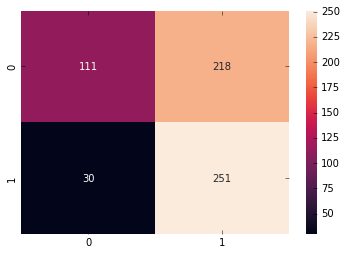

0.4 

Accuracy Score 0.6656
F1 Score 0.6762 

Confusion Matrix


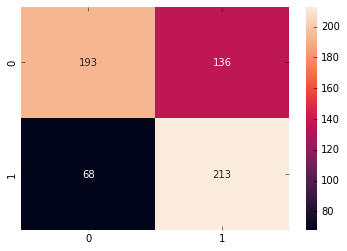

0.5 

Accuracy Score 0.6639
F1 Score 0.6125 

Confusion Matrix


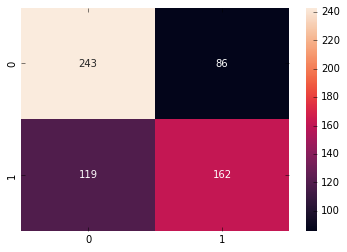

0.6 

Accuracy Score 0.659
F1 Score 0.5336 

Confusion Matrix


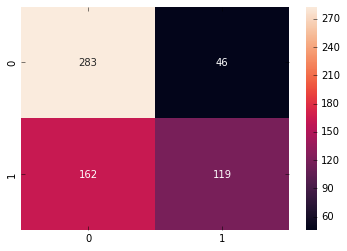

0.7 

Accuracy Score 0.6492
F1 Score 0.4398 

Confusion Matrix


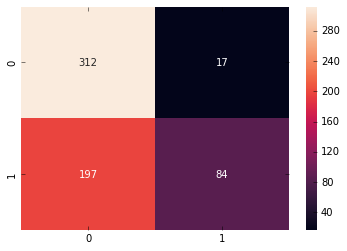

0.8 

Accuracy Score 0.5885
F1 Score 0.1981 

Confusion Matrix


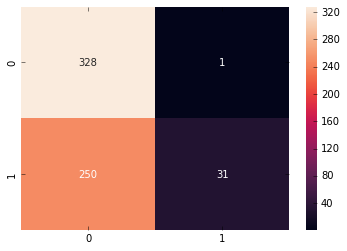

0.9 

Accuracy Score 0.5426
F1 Score 0.0141 

Confusion Matrix


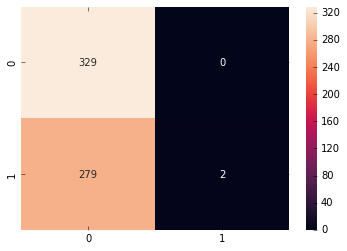

In [133]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(Y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(Y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(Y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(Y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

AUC for the Training Data: 0.733
AUC for the Test Data: 0.714


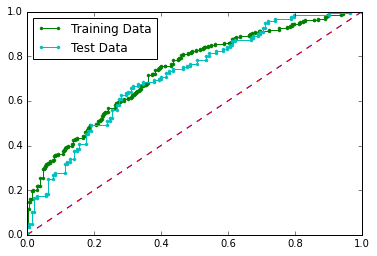

In [134]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [135]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.58
lda_train_f1  0.61


In [136]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.64
lda_test_recall  0.49
lda_test_f1  0.56


In [137]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.67,0.66,0.66,0.64
AUC,0.73,0.72,0.73,0.71
Recall,0.57,0.52,0.58,0.49
Precision,0.66,0.67,0.65,0.64
F1 Score,0.61,0.59,0.61,0.56


Comparing  both  these  models,  we  find  both  results  are  same,  but  LDA works  better  when  there  is  category  target  variable. 

# Q 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

### we  had  done  predictions on both logistic  regression  and  linear  discriminant  analysis.  Both results  are same.   
## EDA Analysis


People  ranging  from  the  age  30  to  50  generally  opt  for  holiday  packages.


We can say that maximum foreign employees didn't choose the package.


We can say that maximum employees with 0 kids choose the holiday package.


We can say that maximum employees with 2,3 and 4 older_children choose the holiday package. And employees with 0 older_children didn't choose the package.


We can say maximum employee didn't choose the package and in that maximum employee with 0 older children choose the package then employee with 2 older kids choose the package.


35 employees with age of 44 have purchased holiday package and only 3 employees with age of 62 have purchased holiday package.


Salary less than 50000 people have opted more for holiday package.

Employee age over 50 to 60 have seems to be not taking the holiday package, whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package.

## The  important  factors  deciding  the  predictions  are  salary,  age  and  educ.

## Recommendations   
For  employee  having  more  than  number  of  older  children  we  can  provide packages  in  holiday  vacation  places. 

For  people  earning  more  than  150000  we  can  provide  vacation  holiday packages. 

# The End_____________________________________________________